# Tutorial file for the r-place-emergence package

#### Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import rplacem.canvas_part as rp
import rplacem.thermo as th
import pickle
import os
import seaborn as sns
import json
import Variables.Variables as var

### Choose an index from the atlas.json file to identify a composition of interest

The r/place [atlas](https://place-atlas.stefanocoding.me/about)
"is an atlas aiming to chart all the artworks created during the r/place April Fools event on Reddit in 2022. It is made with information to each artwork of the canvas provided by the community. The original code was developed by Roland Rytz and is available under the free AGPL license on GitHub. The currently maintained version of the website is managed by Stefano Haagmans and is obtainable under the same license within a [GitHub fork](https://github.com/placeAtlas/atlas). Initial images are provided by Alex Tsernoh."

Each "artwork" or as we call it here, "composition", is indexed according to a string of numbers, found in the atlas.json file. Here, we choose one arbitrarily for demonstration

In [2]:
atlas_id_index = '000006' #'000297'

### Load all the pixel data from the npz file

Next, we load all the pixel change data from the npz file. This npz file is a condensed, time-sorted version of the 79 data files provided by reddit from the 2022 r/place experiment. The get_all_pixel_changes() function loads this data and places it into an array with 6 columns

In [3]:
pixel_changes_all = rp.get_all_pixel_changes()

Print the columns of the pixel_changes_all array for reference

In [4]:
print('  seconds: ' + str(pixel_changes_all['seconds']))
print('  x coord: ' + str(pixel_changes_all['xcoor']))
print('  y coord: ' + str(pixel_changes_all['ycoor']))
print('  user id: ' + str(pixel_changes_all['user']))
print(' color id: ' + str(pixel_changes_all['color']))
print('mod event: ' + str(pixel_changes_all['moderator']))

  seconds: [3.15000000e-01 1.26710000e+01 1.66260000e+01 ... 3.00590172e+05
 3.00590195e+05 3.00590207e+05]
  x coord: [  42  999   44 ...  770 1046    0]
  y coord: [  42  999   42 ...  866 1721 1999]
  user id: [4068945 4068946 4068947 ... 2778754 1591567  583562]
 color id: [16  7 10 ... 31 31 31]
mod event: [False False False ... False False False]


### Define two types of CanvasPart objects

The CanvasPart class is a superclass with subclasses CanvasComposition and CanvasArea. You can think of a CanvasPart as a part of the canvas defined by a spatial border, which can be either defined by the edge of a particular artwork composition as defined by the r/place Atlas or it can be defined by an arbitrary user-defined border path, which can take any shape. The maximum size of a user-defined border is the size of the canvas itself. 

##### Define a CanvasCompsition object

To define a CanvasComposition object, you must supply the atlas composition id index and the pixel change data loaded from the npz file. The constructor then finds and sets the border path, the x and y coordinates inside the border, and the pixel changes within the border of the composition. 

In [5]:
canvas_comp = rp.CanvasPart(id = atlas_id_index)
data_path=os.path.join(os.getcwd(),'data')
atlas_path = os.path.join(data_path,'atlas.json')
composition_classification_file = open(atlas_path)
atlas = json.load(composition_classification_file)

In [6]:
rp.check_time('rp.CanvasPart(id=atlas_id_index, pixel_changes_all=pixel_changes_all, atlas=atlas)')
# getting rid of ind for loop: 0.892 vs 1.632

         127074 function calls (126985 primitive calls) in 0.883 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.883    0.883 {built-in method builtins.exec}
        1    0.000    0.000    0.883    0.883 <string>:1(<module>)
        1    0.000    0.000    0.883    0.883 canvas_part.py:72(__init__)
        1    0.729    0.729    0.881    0.881 canvas_part.py:305(find_pixel_changes_in_boundary)
    28/14    0.125    0.004    0.152    0.011 {built-in method numpy.core._multiarray_umath.implement_array_function}
        4    0.000    0.000    0.068    0.017 <__array_function__ internals>:177(where)
        1    0.000    0.000    0.066    0.066 <__array_function__ internals>:177(append_fields)
        1    0.000    0.000    0.032    0.032 recfunctions.py:654(append_fields)
        1    0.000    0.000    0.026    0.026 <__array_function__ internals>:177(merge_arrays)
        1    0.000    0.000 

In [7]:
print(canvas_comp.__str__())

CanvasPart 
Atlas Composition, id: 000006,         
not Rectangle, 1 time-dependent border_path(s)
2957 pixels in total, x in [909, 959], y in [421, 482]        
119271 pixel changes (including 118499 in composition time ranges)        

Description: 
2b2t is a Minecraft anarchy server, as well as the second oldest Minecraft server. The 2b2t logo was one of the first factions to form, with pixels being placed within the first few seconds. Though many groups and streamers tried to attack or replace it through many means, 2b2t prevailed. 

Pixel changes: 
[(1231.68, 913, 421, 3054718, 16, False, True)
 (1251.755, 914, 421, 2720365, 16, False, True)
 (1271.568, 942, 422, 140766, 5, False, True) ...
 (300511.144, 950, 422, 10380382, 31, False, False)
 (300553.777, 949, 427, 521579, 31, False, False)
 (300558.739, 935, 474, 8959978, 31, False, False)]        



##### Define a CanvasArea object
To define a CanvasArea object, you must supply the border path and the pixel changes from the npz file. 
The border path is a numpy array of x,y points that form the path of the border of the canvas

In [8]:
border_path = np.array([[[0,0],[0,50],[50,50],[50,0]]])

canvas_area = rp.CanvasPart(border_path=border_path, pixel_changes_all=pixel_changes_all)
canvas_area.description = 'The original 1000x1000 canvas posted by reddit'

In [9]:
print(canvas_area.__str__())

CanvasPart 
user-defined area,         
Rectangle, 1 time-dependent border_path(s)
2601 pixels in total, x in [0, 50], y in [0, 50]        
372327 pixel changes (including 372327 in composition time ranges)        

Description: 
The original 1000x1000 canvas posted by reddit 

Pixel changes: 
[(0.315, 42, 42, 4068945, 16, False, True)
 (16.626, 44, 42, 4068947, 10, False, True)
 (21.703, 2, 2, 4068948, 22, False, True) ...
 (300589.027, 0, 0, 1256236, 31, False, True)
 (300589.36, 0, 1, 364556, 31, False, True)
 (300589.387, 0, 0, 1295679, 31, False, True)]        



### Get the pixel changes over time, plot, and save a movie of the frames

Now, we can start to examine how the two CanvasPart objects change over time. 
Lets' choose a time step interval of 900 seconds (15 minutes), and a total time 
of 20 hours (20*3600 seconds).

In [10]:
time_interval= 60*60 #seconds
time_end = 60*3600 #seconds
time_start = 45*3600
times_comp = np.arange(time_start, time_end, time_interval)
times_comp[0]=0

First, let's plot the canvas_comp object for the specified time steps. You'll notice the plotting function returns a list of indices that allow us to quickly select the pixel change data at different time points inside the boundary. The time_inds_list_comp will come in handy for time-step calculations later on. 

Ran 7.142857142857143 %% of the steps
Ran 14.285714285714286 %% of the steps
Ran 21.428571428571427 %% of the steps
Ran 35.714285714285715 %% of the steps
Ran 42.857142857142854 %% of the steps
Ran 57.142857142857146 %% of the steps
Ran 64.28571428571429 %% of the steps
Ran 71.42857142857143 %% of the steps
Ran 85.71428571428571 %% of the steps
Ran 92.85714285714286 %% of the steps
produced 14 images vs time


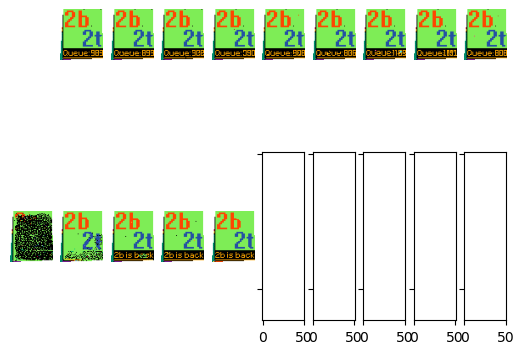

In [11]:
file_size_bmp, file_size_png, time_inds_list_comp = rp.save_part_over_time(canvas_comp,
                                                                      times_comp, #seconds,
                                                                      delete_bmp = True, 
                                                                      delete_png = False, # keep the png files
                                                                      show_plot = True)

We can do the same for the canvas_area object

Ran 5.2631578947368425 %% of the steps
Ran 10.526315789473685 %% of the steps
Ran 21.05263157894737 %% of the steps
Ran 31.57894736842105 %% of the steps
Ran 42.10526315789474 %% of the steps
Ran 52.63157894736842 %% of the steps
Ran 63.1578947368421 %% of the steps
Ran 73.6842105263158 %% of the steps
Ran 84.21052631578948 %% of the steps
Ran 94.73684210526316 %% of the steps
produced 19 images vs time


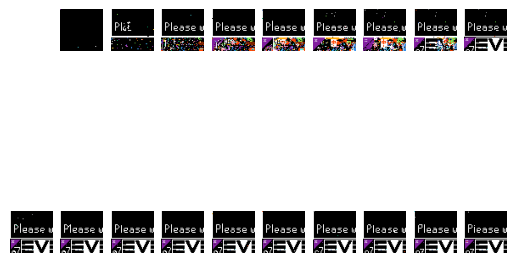

In [12]:
time_interval= 60*60 #seconds
time_end = 20*3600 #seconds
time_start = 0
times_area = np.arange(time_start, time_end, time_interval)

file_size_bmp_area, file_size_png_area, time_inds_list_area = rp.save_part_over_time(canvas_area,
                                                                      times_area,
                                                                      part_name = 'area', # only for name of output
                                                                      delete_bmp = True,
                                                                      delete_png = False,
                                                                      show_plot = True)

##### Save the frames as a movie

In [13]:
image_path = os.path.join(os.getcwd(), 'figs', 'history_000297','VsTime')
image_path_area = os.path.join(os.getcwd(), 'figs', 'history_area','VsTime')

Save frames as a movie

In [14]:
rp.save_movie(image_path, 
              movie_tool='moviepy',
              fps=6,
              codec='mpeg4',#'libx264',
              video_type='mov')# 'mp4'

rp.save_movie(image_path_area, 
              movie_tool='moviepy',
              fps=6,
              codec='mpeg4',#'libx264',
              video_type='mov')# 'mp4'

Moviepy - Building video /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov.
Moviepy - Writing video /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov



Moviepy - Done !
Moviepy - video ready /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov
Moviepy - Building video /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov.
Moviepy - Writing video /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov



Moviepy - Done !
Moviepy - video ready /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov


#### Saving and loading the timestep data

In [15]:
rp.save_canvas_part_time_steps(canvas_comp,  
                               time_inds_list_comp,
                               times_comp,
                               file_size_bmp,
                               file_size_png)

In [16]:
(canvas_comp, 
 time_inds_list_comp,
 times_comp,
 file_size_bmp,
 file_size_png) = rp.load_canvas_part_time_steps()

### Plot the compressed file size ratio over time

Next, we'll perform calculations to further analyze the CanvasPart objects. We can use the compressed file size as a way to characterize the 'complexity' of a part of the canvas. We'll plot the ratio of the compressed file size to the original file size for both the canvas composition and the canvas area

#### Calculate number of pixel changes and touched pixels for thermodynamic quantities


In [17]:
(num_pixel_changes, 
 num_touched_pixels,
 num_users) = th.calc_num_pixel_changes(canvas_comp,
                                         time_inds_list_comp,
                                         time_interval)

##### Plot

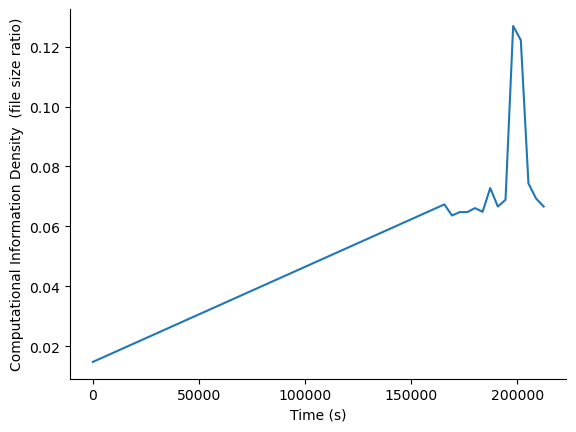

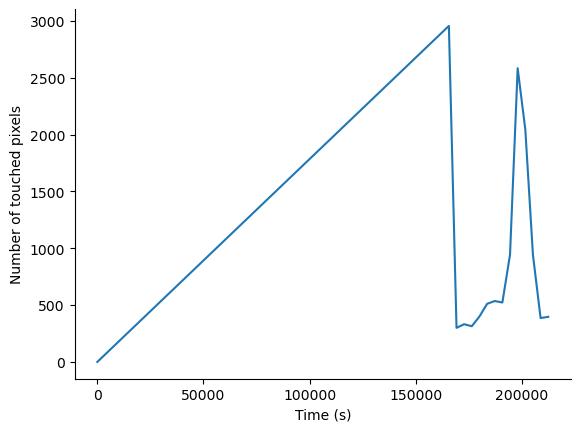

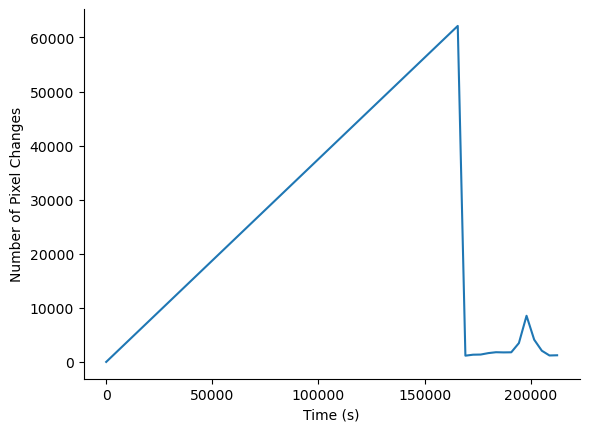

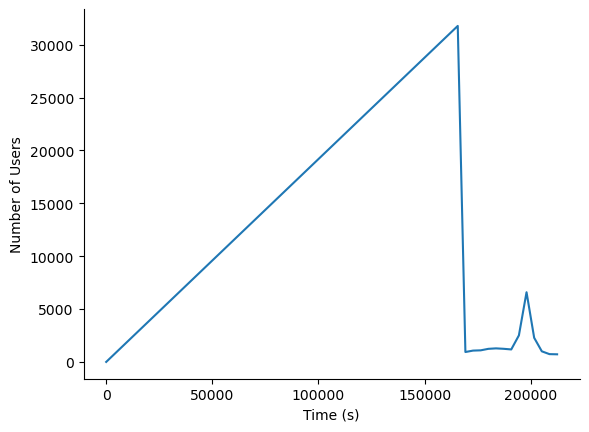

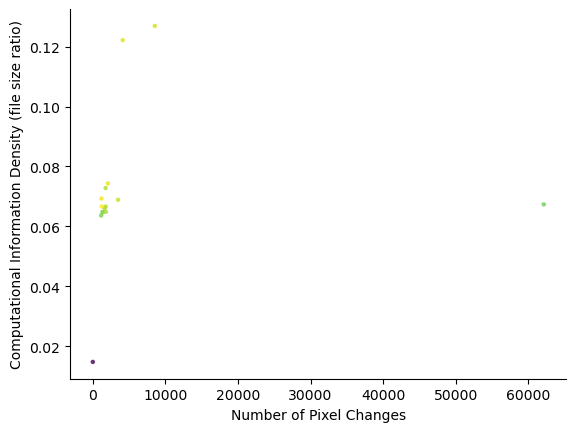

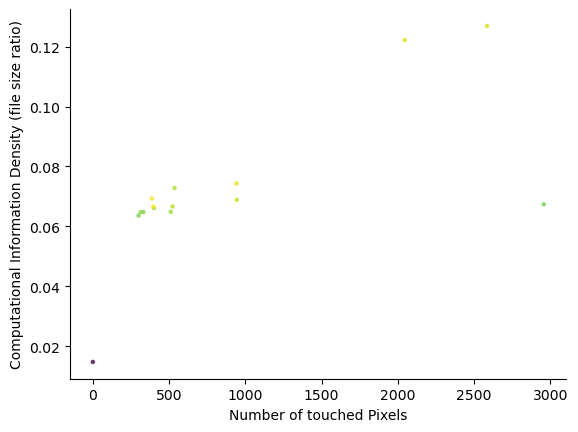

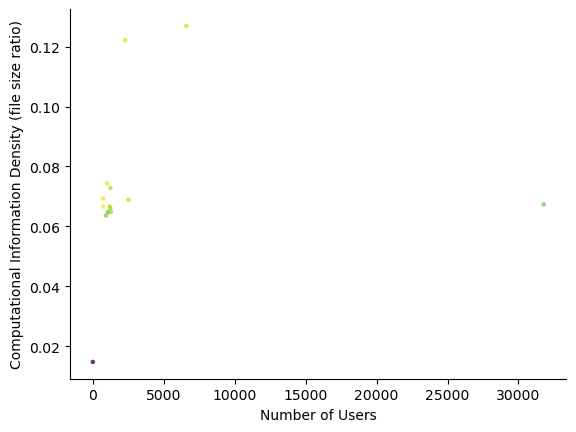

In [18]:
(fig_cid_vs_time, 
fig_num_touched_pix_vs_time, 
fig_num_pix_changes_vs_time, 
fig_users_vs_time,
fig_cid_vs_num_pix_changes,
fig_cid_vs_num_touched_pix,
fig_cid_vs_num_users)= th.plot_compression_vs_pixel_changes(num_pixel_changes, 
                                                            num_touched_pixels, 
                                                            num_users,
                                                            times_comp,
                                                            file_size_png, 
                                                            file_size_bmp)

manipulate the plots

(0.0, 5000.0)

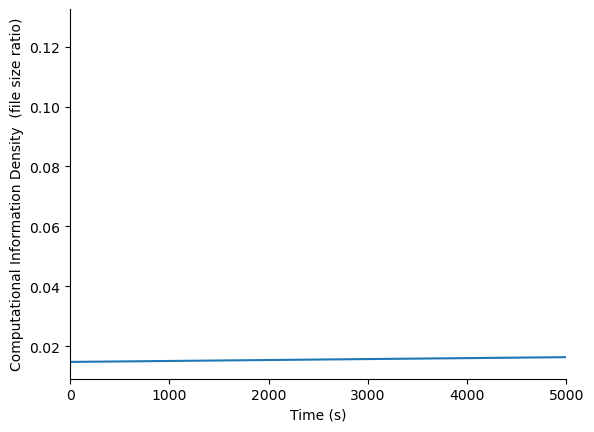

In [19]:
plt.figure()
plt.sca(fig_cid_vs_time.gca())
plt.xlim([0,5000])

### Calculate the stability

In [20]:
stability_vs_time_new = th.stability_new(canvas_comp,
                                  save_images=False,
                                  t_lims=times_comp,
                                  save_pickle=False
                                  )

stability_vs_time = th.stability_new(canvas_comp,
                                  save_images=False,
                                  t_lims=times_comp,
                                  save_pickle=False
                                  )

In [21]:
rp.check_time('th.stability(canvas_comp, save_images=False,t_lims=times_comp,save_pickle=False)')
# starting point: 0.208 seconds for comp 6
# ignoring normalizations
# starting point: 
# 0.204 for original logic
# 0.174 seconds when we make it completely same logic but just with coords (and excluding the where())
# 1.5 seconds with coords and where()
# 0.241 for removing where and putting logic which isn't quite right but could be close
# 0.2 for when we get rid of loop 1
# 0.126 when we get rid of the current color loop
# 0.016 if we get rid of the time loop wowieee
# 0.149 when we correct the logic for coord_inds and add back the time loop. 
# 0.151 when we add in the ignoring of time before
# 0.157 wow thats actually a lot faster than the original still??
# 0.151 changing argsort to sort

         45382 function calls in 0.202 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.202    0.202 {built-in method builtins.exec}
        1    0.000    0.000    0.202    0.202 <string>:1(<module>)
        1    0.182    0.182    0.202    0.202 thermo.py:209(stability)
       71    0.000    0.000    0.013    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
       14    0.000    0.000    0.007    0.000 <__array_function__ internals>:177(take_along_axis)
       14    0.006    0.000    0.007    0.000 shape_base.py:56(take_along_axis)
    44436    0.006    0.000    0.006    0.000 {built-in method builtins.max}
       14    0.000    0.000    0.005    0.000 <__array_function__ internals>:177(argsort)
       14    0.000    0.000    0.005    0.000 fromnumeric.py:1012(argsort)
       14    0.000    0.000    0.005    0.000 fromnumeric.py:51(_wrapfunc)
       14    0.005 

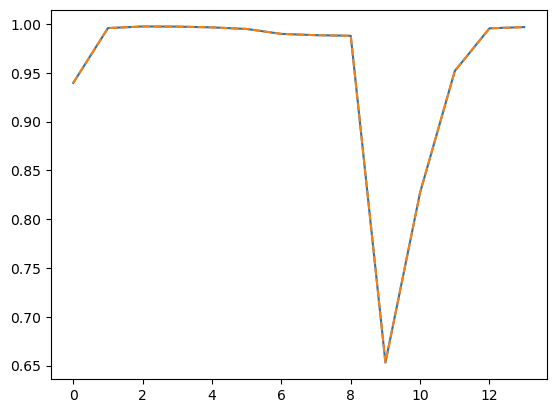

In [29]:
plt.plot(stability_vs_time)
plt.plot(stability_vs_time_new, '--')